In [2]:
#Initial imports

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [3]:
#Reading the VYGVF closing prices from the VYGVF.csv to a pandas dataframe
#Index was set to date, and unnecessary columns were dropped

vygvf_closing_prices = pd.read_csv('VYGVF.csv')
vygvf_closing_prices.set_index('Date', inplace=True)
vygvf_closing_prices.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
vygvf_closing_prices.describe()

#20 day moving average and 20 day rolling standard deviation were calculated and added as new columns

vygvf_closing_prices['mavg20'] = vygvf_closing_prices['Close'].rolling(window=20).mean()
vygvf_closing_prices['20dSTD'] = vygvf_closing_prices['Close'].rolling(window=20).std()

#Upper and Lower limits for the bands were calculated using the 20 moving average and +/- 2 * Standard deviation

vygvf_closing_prices['Upper'] = vygvf_closing_prices['mavg20'] + (vygvf_closing_prices['20dSTD'] * 2)
vygvf_closing_prices['Lower'] = vygvf_closing_prices['mavg20'] - (vygvf_closing_prices['20dSTD'] * 2)

vygvf_closing_prices = vygvf_closing_prices.dropna()
vygvf_closing_prices.head()

,Close,mavg20,20dSTD,Upper,Lower
Date,,,,,
2021-04-29,19.020000,22.36885,3.685597,29.740044,14.997655
2021-04-30,22.500000,22.12435,3.492086,29.108521,15.140179
2021-05-03,23.301001,21.83940,3.113507,28.066414,15.612386
2021-05-04,21.980000,21.56690,2.823440,27.213779,15.920020
2021-05-05,22.700001,21.55090,2.815668,27.182235,15.919564


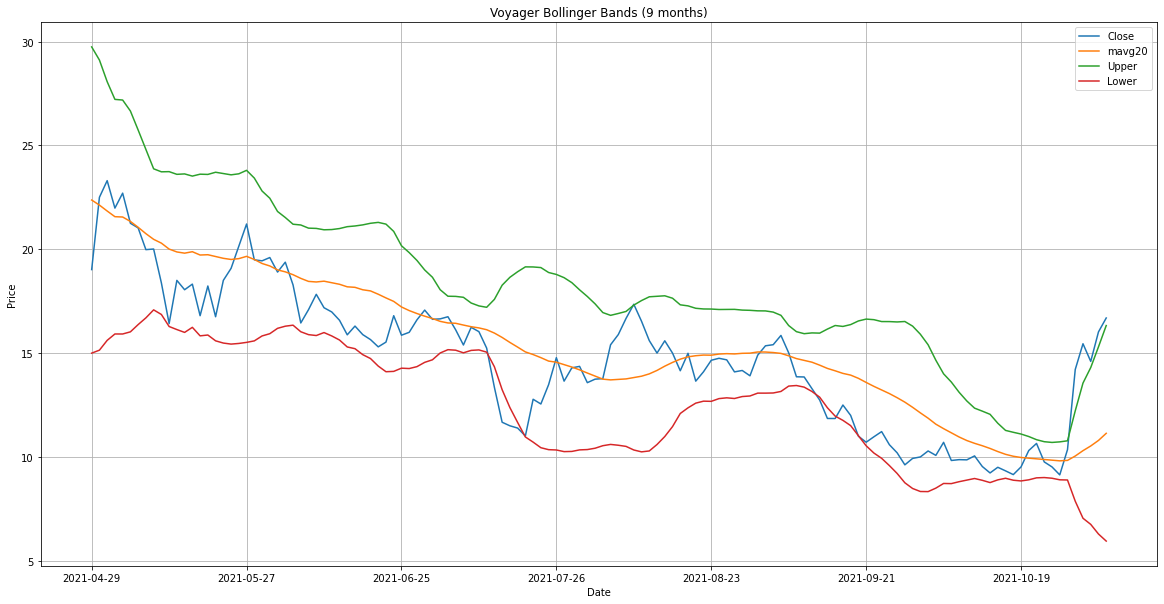

In [8]:
#Plotting the bands and saving the figure as an image

vygvf_closing_prices[['Close','mavg20','Upper','Lower']].plot(figsize=(20,10))
plt.grid(True)
plt.title('Voyager Bollinger Bands (9 months)')
plt.axis('tight')
plt.ylabel('Price')
plt.savefig('vygvf_bands.png')
plt.show()

In [9]:
#Bollinger bands can be set up for the VGX token in the same manner

vgx_closing_prices = pd.read_csv('VGX-USD.csv')
vgx_closing_prices.set_index('Date', inplace=True)
vgx_closing_prices.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
vgx_closing_prices.describe()

vgx_closing_prices['mavg20'] = vgx_closing_prices['Close'].rolling(window=20).mean()
vgx_closing_prices['20dSTD'] = vgx_closing_prices['Close'].rolling(window=20).std()

vgx_closing_prices['Upper'] = vgx_closing_prices['mavg20'] + (vgx_closing_prices['20dSTD'] * 2)
vgx_closing_prices['Lower'] = vgx_closing_prices['mavg20'] - (vgx_closing_prices['20dSTD'] * 2)

vgx_closing_prices = vgx_closing_prices.dropna()
vgx_closing_prices.head()

,Close,mavg20,20dSTD,Upper,Lower
Date,,,,,
2020-11-08,0.151101,0.152085,0.009769,0.171624,0.132546
2020-11-09,0.146245,0.153054,0.007921,0.168897,0.137212
2020-11-10,0.151682,0.152991,0.007927,0.168845,0.137137
2020-11-11,0.148424,0.152378,0.007774,0.167926,0.136831
2020-11-12,0.144395,0.151573,0.007722,0.167016,0.136129


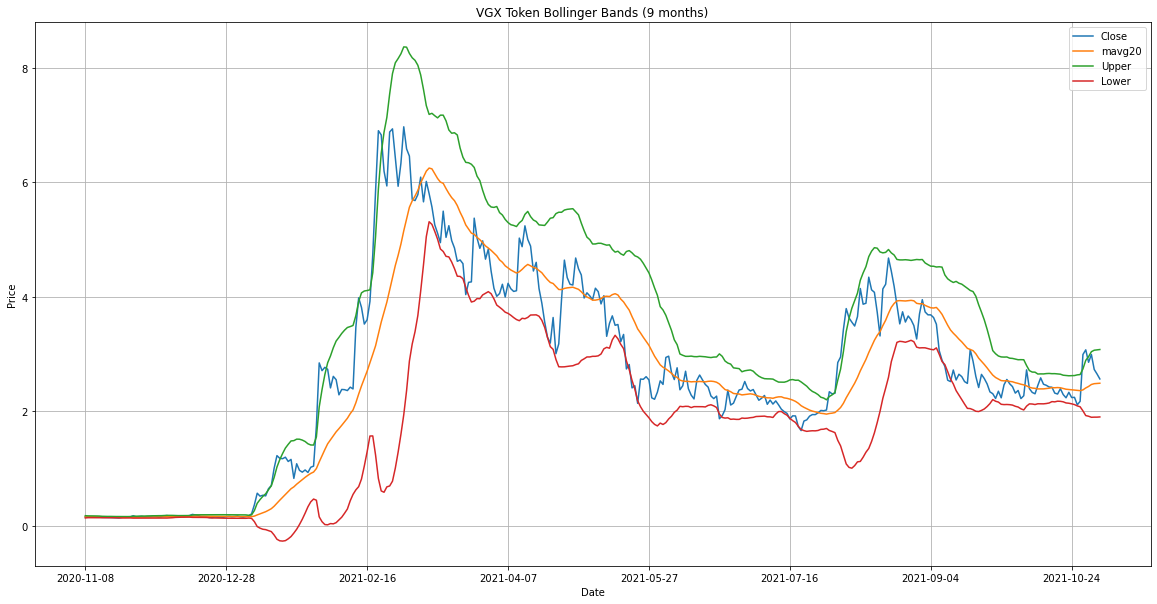

In [10]:
vgx_closing_prices[['Close','mavg20','Upper','Lower']].plot(figsize=(20,10))
plt.grid(True)
plt.title('VGX Token Bollinger Bands (9 months)')
plt.axis('tight')
plt.ylabel('Price')
plt.savefig('vgx_bands.png')
plt.show()